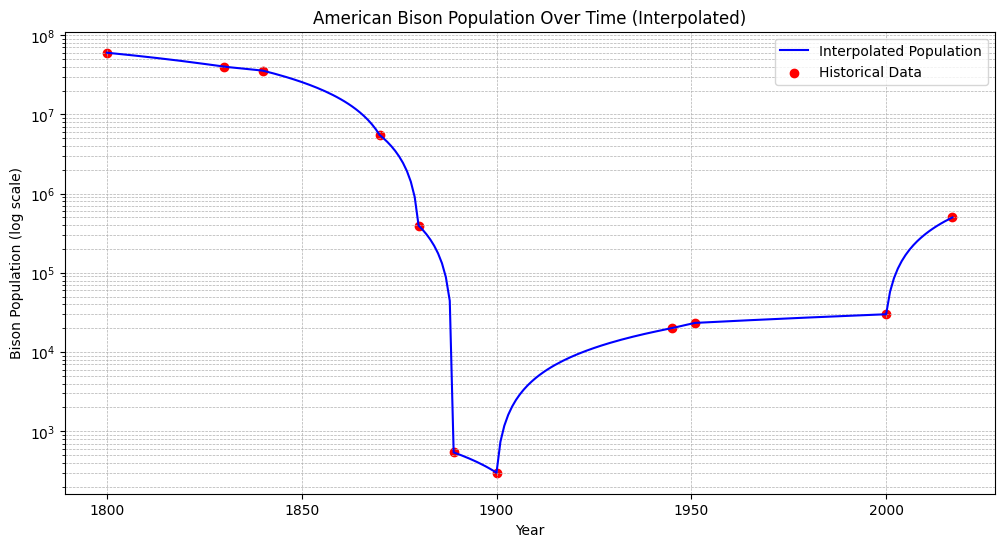

CSV file saved to: E:\file_main\Major_1\fauna-forecast\data\raw\bison_population_interpolated.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === 1. Historical data (year, population) ===
data = {
    "Year": [
        1800, 1830, 1840, 1870, 1880, 1889, 
        1900, 1945, 1951, 2000, 2017
    ],
    "Population": [
        60000000, 40000000, 35650000, 5500000, 395000, 541,
        300, 5000+15000, 23340, 30000, 500000
    ]
}

df = pd.DataFrame(data)

# === 2. Interpolate missing years (linear) ===
df_full = pd.DataFrame({"Year": np.arange(df["Year"].min(), df["Year"].max() + 1)})
df_full = df_full.merge(df, on="Year", how="left")
df_full["Population"] = df_full["Population"].interpolate(method="linear")

# === 3. Visualization ===
plt.figure(figsize=(12, 6))
plt.plot(df_full["Year"], df_full["Population"], label="Interpolated Population", color="blue")
plt.scatter(df["Year"], df["Population"], color="red", label="Historical Data")
plt.yscale("log")  # log scale is biologically accurate (huge range)
plt.xlabel("Year")
plt.ylabel("Bison Population (log scale)")
plt.title("American Bison Population Over Time (Interpolated)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# === 4. Save to CSV ===
save_path = r"E:\file_main\Major_1\fauna-forecast\data\raw\bison_population_interpolated.csv"
os.makedirs(os.path.dirname(save_path), exist_ok=True)  # ensure folder exists
df_full.to_csv(save_path, index=False)

print(f"CSV file saved to: {save_path}")
